# ✅ **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')

# 💡**Load the Dataset**

In [ ]:
df = pd.read_csv("/content/Bankruptcies.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# 🧠**Exploratry Data Analysis**

## 1️⃣ Class Distribuation : Bankrupt VS Non-Bankrupt




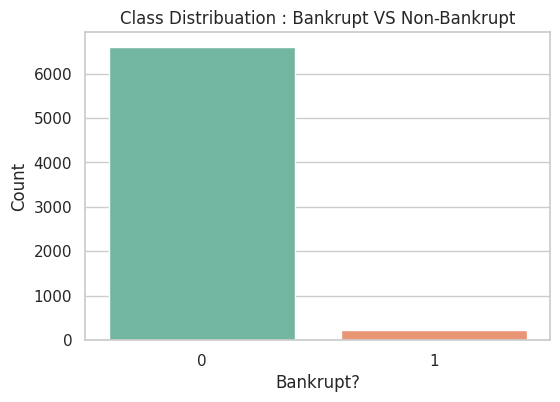

In [ ]:
sns.set(style = 'whitegrid')

plt.figure(figsize = (6,4))
sns.countplot(x = 'Bankrupt?' , data=df , palette = 'Set2')
plt.title('Class Distribuation : Bankrupt VS Non-Bankrupt')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()


In [ ]:
correlation_with_target = df.corr(numeric_only=True)['Bankrupt?'].sort_values(ascending=False)

#Top 10 positive and 10 negative correlations (excluding target itself)
top_positive_corr = correlation_with_target[1:11]
top_negative_corr = correlation_with_target[-10:]

print(" * Top 10 Positive Correlations:")
print(top_positive_corr)
print(" ")
print(" * Top 10 Negative Correlations:")
print(top_negative_corr)

 * Top 10 Positive Correlations:
Debt ratio %                           0.250161
Current Liability to Assets            0.194494
Borrowing dependency                   0.176543
Current Liability to Current Assets    0.171306
Liability to Equity                    0.166812
Current Liabilities/Equity             0.153828
Current Liability to Equity            0.153828
Liability-Assets Flag                  0.139212
Total expense/Assets                   0.139049
Equity to Long-term Liability          0.139014
Name: Bankrupt?, dtype: float64
 
 * Top 10 Negative Correlations:
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persistent EPS in the Last Four Seasons                   -0.219560
Net worth/Assets                                          -0.250161
ROA(C) before interest and depreciation before interest   -0.260807
ROA(B) befor

## 2️⃣ Top Features Correlated with Bankruptcy





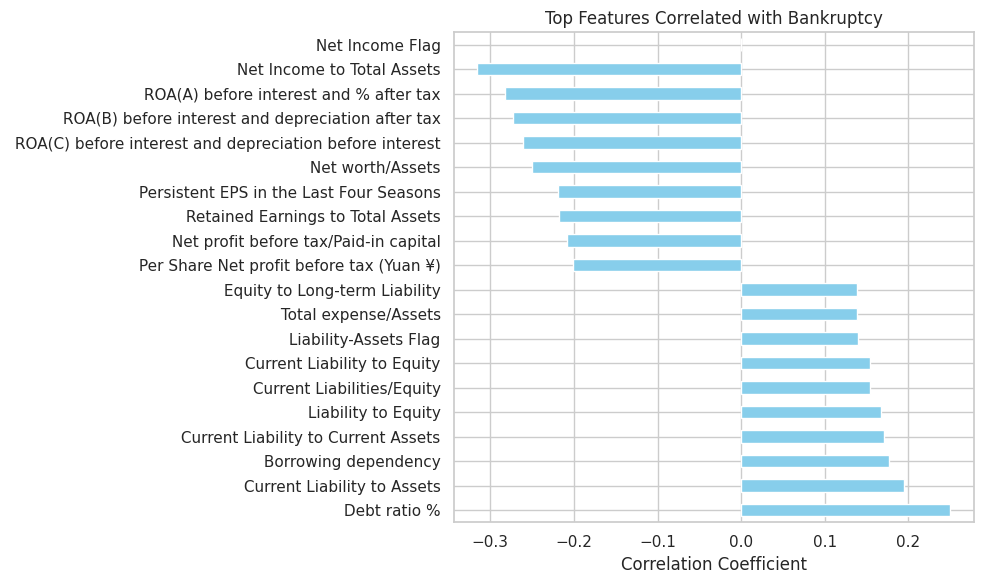

In [ ]:
# Combine for visualization
top_corr_features = pd.concat([top_positive_corr, top_negative_corr])

# Plot
plt.figure(figsize=(10, 6))
top_corr_features.plot(kind='barh', color='skyblue')
plt.title('Top Features Correlated with Bankruptcy')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Print feature names and correlation values
print(top_corr_features)

Debt ratio %                                               0.250161
Current Liability to Assets                                0.194494
Borrowing dependency                                       0.176543
Current Liability to Current Assets                        0.171306
Liability to Equity                                        0.166812
Current Liabilities/Equity                                 0.153828
Current Liability to Equity                                0.153828
Liability-Assets Flag                                      0.139212
Total expense/Assets                                       0.139049
Equity to Long-term Liability                              0.139014
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persistent EPS in the Last Four Seasons                   -0.219560
Net worth/Assets                                

## 3️⃣ Correlation Heatmap of Financial Features

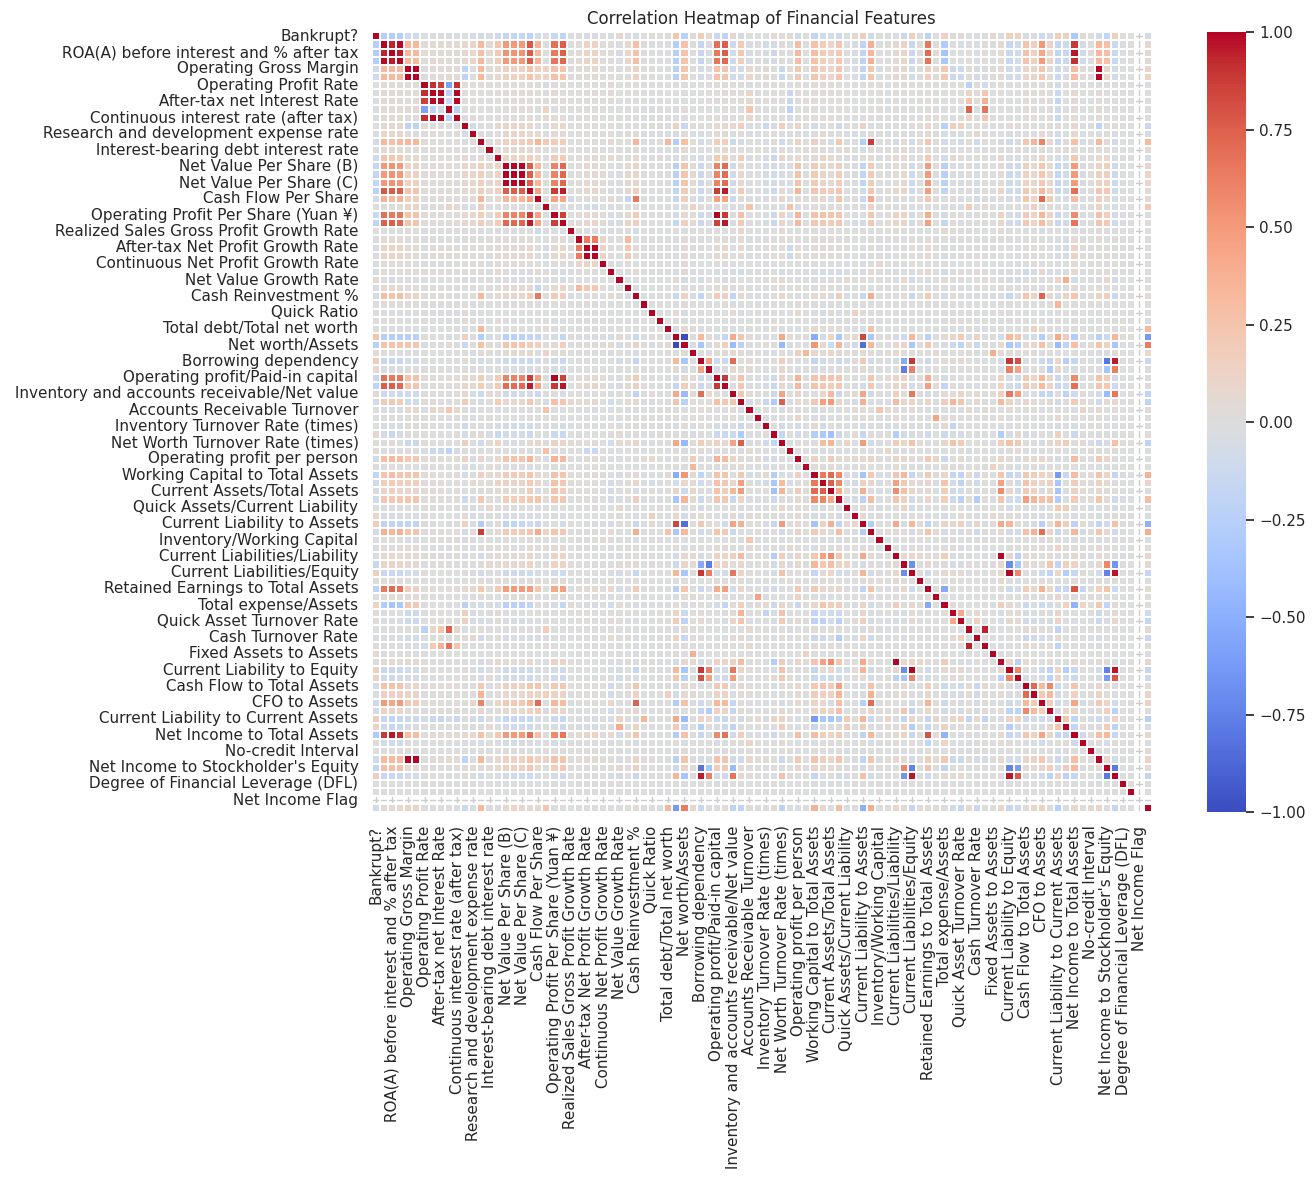

In [ ]:
plt.figure(figsize=(15, 12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.3)
plt.title('Correlation Heatmap of Financial Features')
plt.tight_layout()
plt.show()

#🧪**Data Splitting**

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Bankrupt?' , axis=1)
y = df['Bankrupt?']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state = 42 , stratify = y)

# Apply SMOTE to trainning data only
smote = SMOTE (random_state = 42)
X_train_resampled , y_train_resampled = smote.fit_resample(X_train , y_train)


In [ ]:
# Check class distribuation After SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 5279, 1: 176})
After SMOTE: Counter({0: 5279, 1: 5279})


# 📈 **Model Selection**

## 1️⃣ Logistic Regression

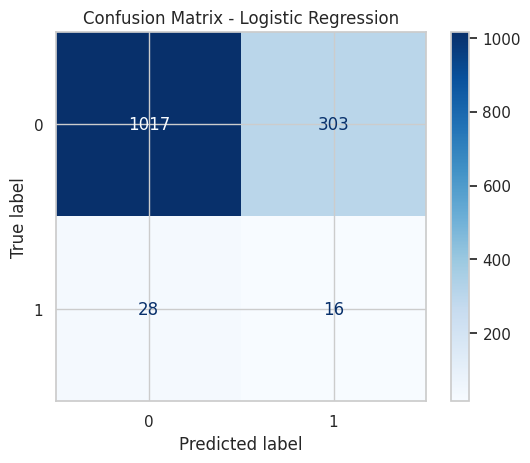

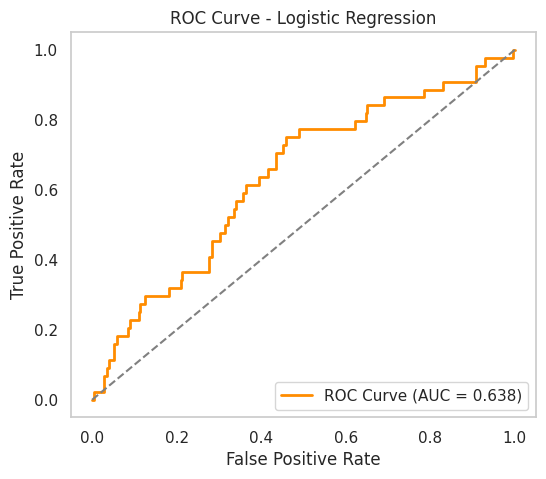

  
📊 Classification Report:
              precision    recall  f1-score   support

           0      0.973     0.770     0.860      1320
           1      0.050     0.364     0.088        44

    accuracy                          0.757      1364
   macro avg      0.512     0.567     0.474      1364
weighted avg      0.943     0.757     0.835      1364



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print("   ")
print("   ")
# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print("  ")

# --- Classification Report ---
print("📊 Classification Report:")
print(classification_report(y_test, y_pred_lr, digits=3))


## 2️⃣ Random Forest

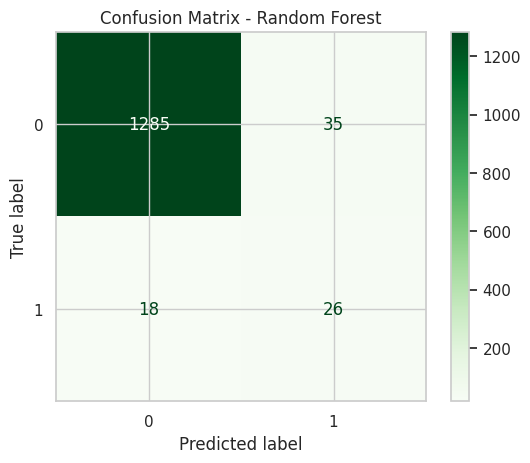

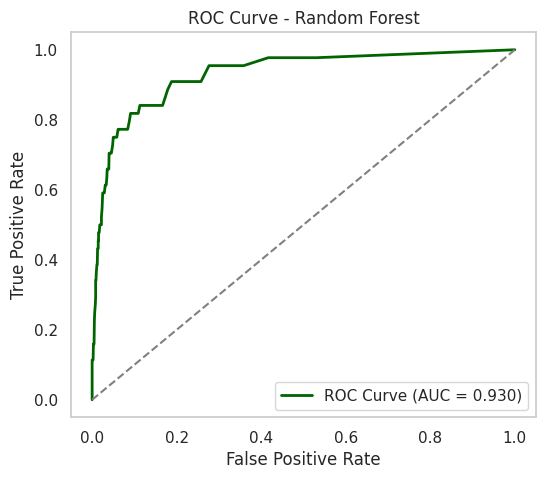

In [ ]:

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# --- Confusion Matrix ---
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("  ")

# --- ROC Curve ---
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## 3️⃣ Support Vector Machine (SVM)

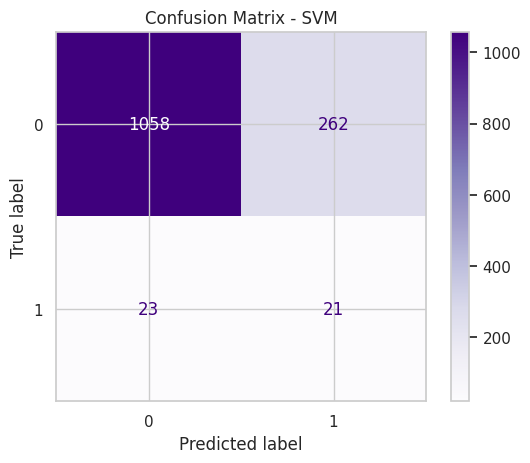

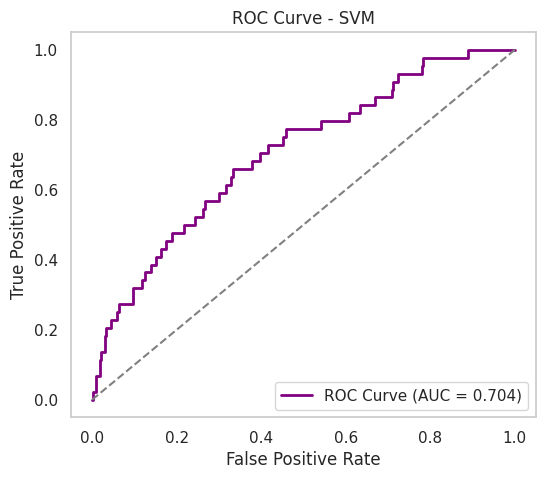

  
📊 Classification Report:
              precision    recall  f1-score   support

           0      0.979     0.802     0.881      1320
           1      0.074     0.477     0.128        44

    accuracy                          0.791      1364
   macro avg      0.526     0.639     0.505      1364
weighted avg      0.950     0.791     0.857      1364



In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# --- Confusion Matrix ---
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.show()
print("  ")

# --- ROC Curve ---
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(6, 5))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()
print("  ")

# --- Classification Report ---
print("📊 Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=3))


## 4️⃣ KNeighborsClassifier (KNN)

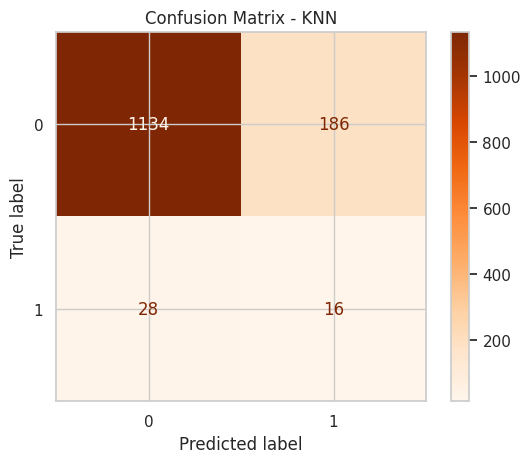

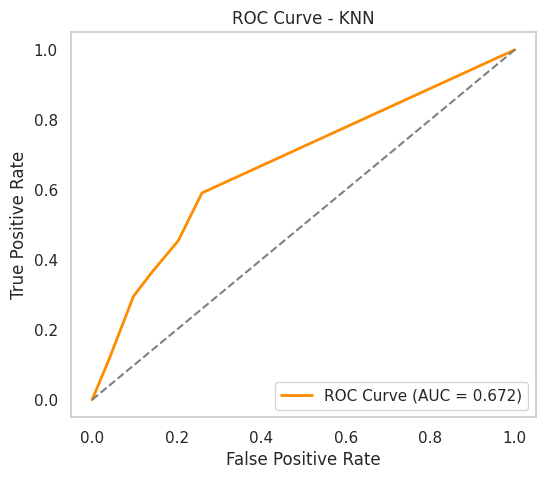

  
📊 Classification Report:
              precision    recall  f1-score   support

           0      0.976     0.859     0.914      1320
           1      0.079     0.364     0.130        44

    accuracy                          0.843      1364
   macro avg      0.528     0.611     0.522      1364
weighted avg      0.947     0.843     0.888      1364



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model  =KNeighborsClassifier()
knn_model.fit(X_train_resampled , y_train_resampled)

# Predict
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[: ,1]


# ---Confusion Matrix ---
cm_knn = (confusion_matrix(y_test , y_pred_knn))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn , display_labels=knn_model.classes_)
disp_knn.plot(cmap = 'Oranges')
plt.title("Confusion Matrix - KNN")
plt.show()

print("   ")

# --- ROC Curve ---
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 5))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print("  ")

# --- Classification Report ---
print("📊 Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=3))


## 5️⃣ Voting Classifier


In [ ]:
from sklearn.ensemble import VotingClassifier

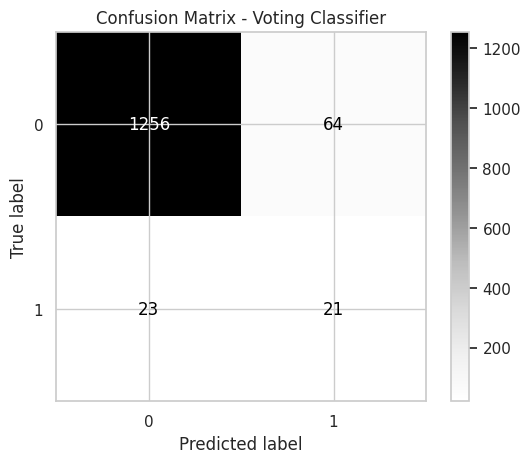

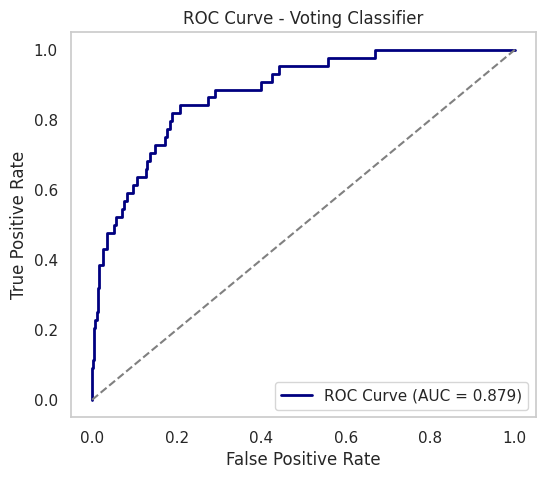

  
📊 Classification Report:
              precision    recall  f1-score   support

           0      0.982     0.952     0.967      1320
           1      0.247     0.477     0.326        44

    accuracy                          0.936      1364
   macro avg      0.615     0.714     0.646      1364
weighted avg      0.958     0.936     0.946      1364



In [ ]:

voting_clf = VotingClassifier(
    estimators = [
        ('rf', rf_model),
        ('svm', svm_model)
    ],
    voting = 'soft' #'soft' uses predicted probablities
)

# Train the ensemble
voting_clf.fit(X_train_resampled , y_train_resampled)

# Predict
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

# confusion matrix
cm_voting = confusion_matrix(y_test , y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix = cm_voting , display_labels = voting_clf.classes_)
disp_voting.plot(cmap = 'Grays')
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

print(" ")

# ROC Curve
fpr_voting , tpr_voting , _ = roc_curve(y_test , y_proba_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

plt.figure(figsize = (6,5))
plt.plot(fpr_voting, tpr_voting, color = 'navy', lw=2 , label = f'ROC Curve (AUC = {roc_auc_voting:.3f})')
plt.plot([0,1],[0,1], color = 'gray', linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

print('  ')
# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test , y_pred_voting , digits = 3))

# 🚀 **Random forest tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_params = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 5, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' : [True , False]
}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 42),
                               param_distributions = rf_params,
                               n_iter = 20,
                               cv=3,
                               verbose = 1,
                               random_state = 42,
                               n_jobs = -1)

rf_random.fit(X_train_resampled , y_train_resampled)
best_rf = rf_random.best_estimator_
print("✅ Best RF Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


# ✅**Rebuilding voting classifier with tune models**


In [ ]:
voting_tuned = VotingClassifier(
    estimators = [
        ('rf',best_rf),
        ('svm',svm_model)
    ],
    voting = 'soft'
)

voting_tuned.fit(X_train_resampled , y_train_resampled)

#predict
y_pred_tuned = voting_tuned.predict(X_test)
y_proba_tuned = voting_tuned.predict_proba(X_test)[:, 1]


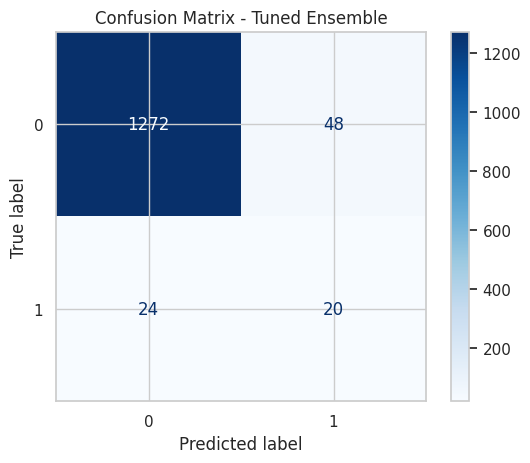

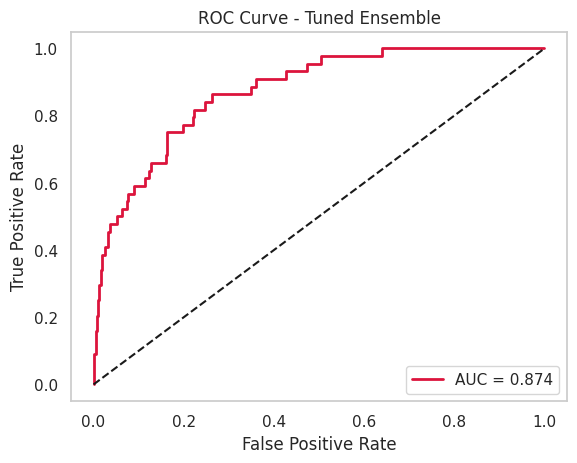

  
📊 Classification Report (Tuned Ensemble):
              precision    recall  f1-score   support

           0      0.981     0.964     0.972      1320
           1      0.294     0.455     0.357        44

    accuracy                          0.947      1364
   macro avg      0.638     0.709     0.665      1364
weighted avg      0.959     0.947     0.953      1364



In [ ]:
# evaluation
cm_tuned = confusion_matrix(y_test , y_pred_tuned)
ConfusionMatrixDisplay(cm_tuned, display_labels=voting_tuned.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Ensemble")
plt.show()

fpr_tuned , tpr_tuned, _ = roc_curve(y_test , y_proba_tuned)
roc_auc_tuned = auc(fpr_tuned , tpr_tuned)

print("  ")
plt.plot(fpr_tuned , tpr_tuned , color = 'crimson', lw=2 , label = f'AUC = {roc_auc_tuned:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Tuned Ensemble")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

print("  ")

print("📊 Classification Report (Tuned Ensemble):")
print(classification_report(y_test, y_pred_tuned, digits=3))

# 📊 **Comparison of Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score , f1_score , roc_auc_score

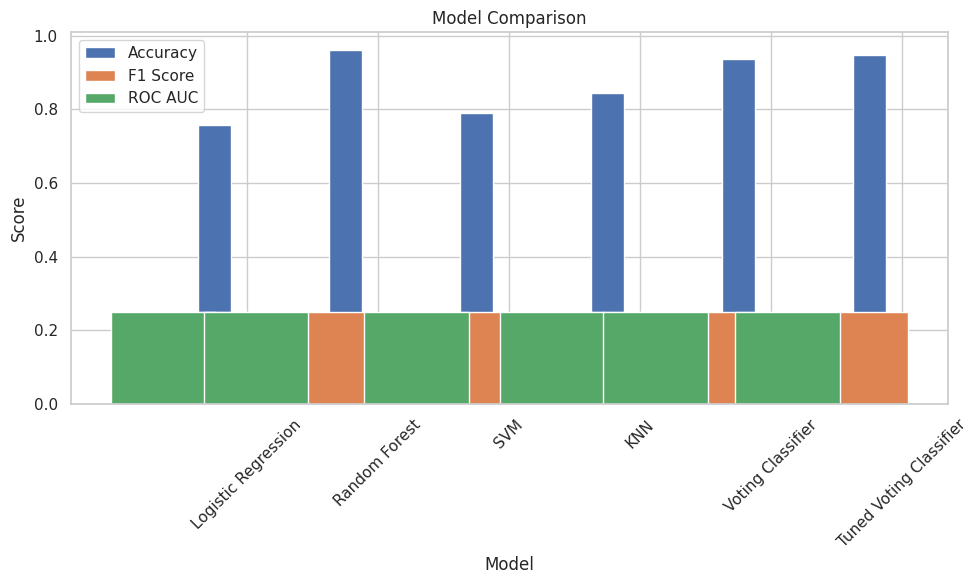

In [ ]:
models = {
    'Logistic Regression' : (y_pred_lr , y_proba_lr),
    'Random Forest' : (y_pred_rf , y_proba_rf),
    'SVM': (y_pred_svm , y_proba_svm),
    'KNN' : (y_pred_knn , y_proba_knn),
    'Voting Classifier' : (y_pred_voting , y_proba_voting),
    'Tuned Voting Classifier' : (y_pred_tuned , y_proba_tuned)
}

# store metrics
model_names = []
accuracies = []
f1_scores = []
roc_aucs = []

for name, (pred , proba) in models.items():
  model_names.append(name)
  accuracies.append(accuracy_score(y_test , pred))
  f1_scores.append(f1_score(y_test , pred))
  roc_aucs.append(roc_auc_score(y_test , proba))

# plotting
x = np.arange(len(model_names))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width , accuracies , width , label = 'Accuracy')
plt.bar(x - f1_scores , width , label = 'F1 Score')
plt.bar(x - roc_aucs , width , label = 'ROC AUC')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(ticks = x , labels = model_names , rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()

# **Feature importance**

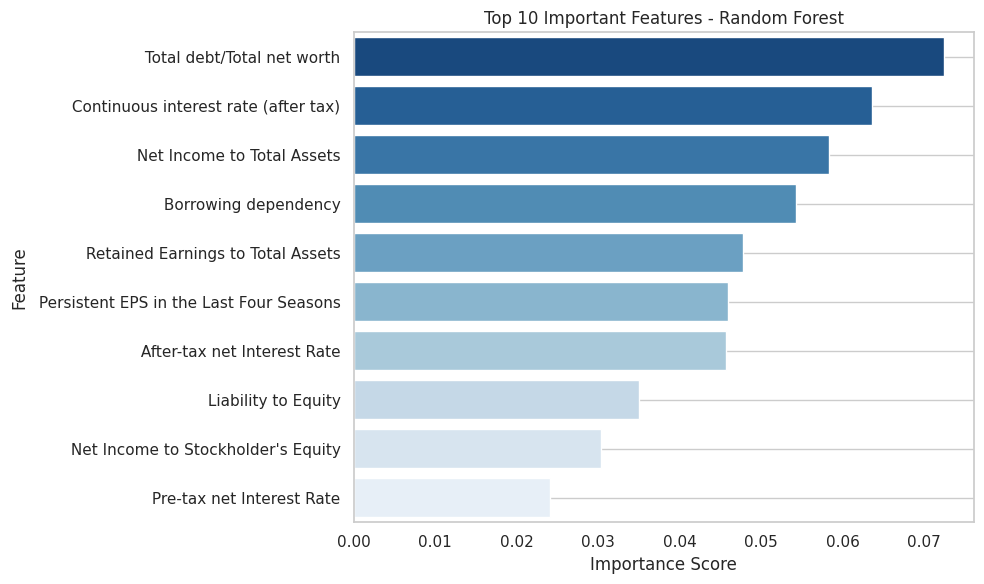

In [ ]:
# Use the tuned Random forest model
importances = best_rf.feature_importances_
features = X.columns

# Sort
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx][:10], y=features[sorted_idx][:10], palette='Blues_r')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.tight_layout()
plt.show()


# 🔍 **Model Comparison in Tabel Format**


In [ ]:
import pandas as pd

performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1-Score': f1_scores,
    'ROC AUC': roc_aucs
})

performance_df.sort_values(by='ROC AUC', ascending=False, inplace=True)
print(performance_df)


                     Model  Accuracy  F1-Score   ROC AUC
1            Random Forest  0.961144  0.495238  0.930019
4        Voting Classifier  0.936217  0.325581  0.879218
5  Tuned Voting Classifier  0.947214  0.357143  0.874001
2                      SVM  0.791056  0.128440  0.704339
3                      KNN  0.843109  0.130081  0.672185
0      Logistic Regression  0.757331  0.088154  0.638275
